# Calculating the power spectral density of a time series

_Rev08 270819 DAL, Physics SFU_

The power spectral density (PSD) is a measure of the power of a signal as a function of frequency. 

Here we demonstrate the PSD by studying an overdamped particle in a trap (potential well).

## Load required libraries

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

## Simulate the trajectory of a particle in an optical trap

In [ ]:
# first define the number of stepspand the times
n = 100000
dt = 0.001
times = np.linspace(0,n*dt,n, endpoint=True)

Define the characteristics of the particle's diffusion and the trap strength.

In [ ]:
kB = 1.38e-23 #Boltzman constant
R = 1e-6 #Particle size [m]
eta = 0.001 #Viscosity [Pa s]
T = 300 #Temperature [K]
k = 1e-6 #Trap stiffness / Spring constant [N/m]
gamma =6*np.pi*R*eta #Friction coefficient
D = kB*T/gamma #Diffusion constant

position = np.zeros(n)
position[0] = 0

for i in range(1,n):
    # deterministic step
    position[i] = position[i-1] - k*dt/gamma*position[i-1]
    # diffusive step
    position[i] = position[i] + np.sqrt(2*D*dt)*np.random.randn(1)


Plot the trajectory of the particle.

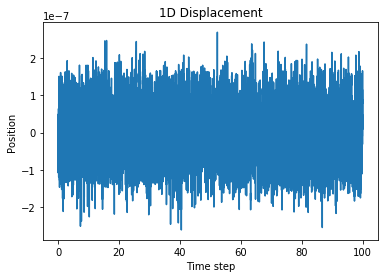

In [ ]:
plt.plot(times,position)
plt.title('1D Displacement')
plt.xlabel('Time step')
plt.ylabel('Position')
plt.show()

## Calculate the autocorrelation function 
[Not clear why we are doing this or why it is needed.]

In [ ]:
def autocorr(x):
    norm = sum(x*x)
    result = np.correlate(x, x, mode='full') / norm
    return result[result.size//2:]

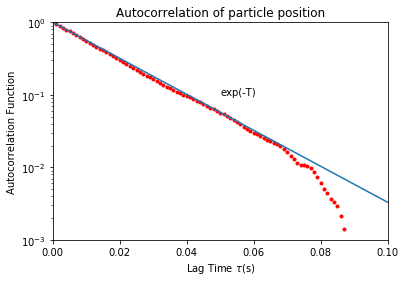

In [ ]:
ACF = autocorr(position)

# plot
plt.plot(times, ACF, 'r.')
plt.plot(times, np.exp(-times/0.0175))
plt.title('Autocorrelation of particle position')
plt.ylabel("Autocorrelation Function")
plt.xlabel("Lag Time " + r'$\tau$' + "(s)")
plt.yscale('log')
plt.xlim(0,0.1)
plt.ylim(0.001,1)
plt.annotate('exp(-T)',(0.05,0.1))
plt.show()

## Calculate the power spectral density

Calculate the PSD using matplotlib.pyplot.psd()

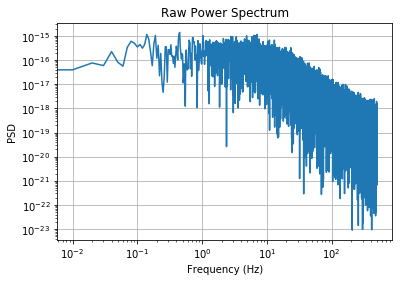

In [ ]:
P,freq,line = plt.psd(position, NFFT=n, Fs=1/dt, return_line=True)
plt.close()

plt.plot(freq,P)
plt.title('Raw Power Spectrum')
plt.yscale('log')
plt.xscale('log')
plt.ylabel("PSD")
plt.xlabel("Frequency (Hz)")
plt.grid(which='major', axis='both')

plt.show()

The Noise and Signal are both exponentially distributed. Averaging over 10, 100, 1000 blocks, we reduce the noise (and make it more gaussian).  As a consequence of averaging we lose lose frequencies.  Notice the disortion as the frequencies approach half the "sampling fequency (dt).

The Power Spectrums are plotted against the theory
$P(\omega) = 2\left(\frac{2D}{\omega^2+\omega_c^2}\right)$

The leading factor of 2 is because matplotlib.psd() operation normalizes to 1-sided spectrum.

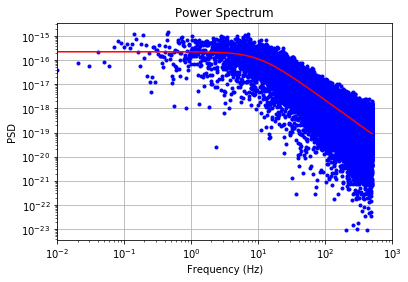

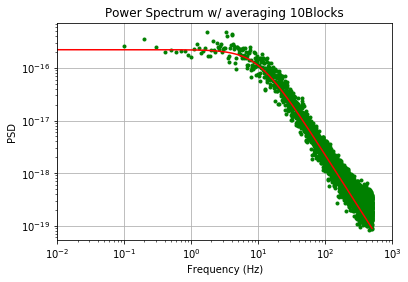

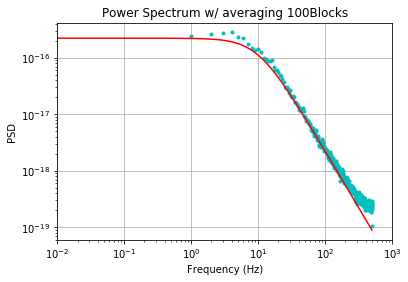

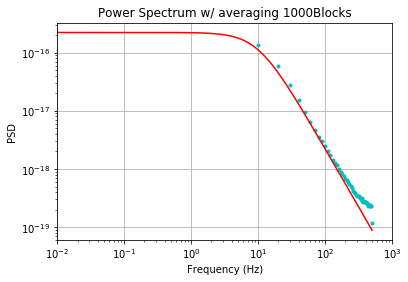

In [ ]:
P10,freq10,line = plt.psd(position, NFFT=n//10, Fs=1/dt, return_line=True)
P100,freq100,line = plt.psd(position, NFFT=n//100, Fs=1/dt, return_line=True)
P1000,freq1000,line = plt.psd(position, NFFT=n//1000, Fs=1/dt, return_line=True)
plt.close()

def PSD_fit(x, fc):
    return 4*D/((2*math.pi*x)**2 + (2*math.pi*fc)**2)

plt.figure(1)
plt.plot(freq,P, 'b.')
plt.plot(freq,PSD_fit(freq,10), 'r-')
plt.title('Power Spectrum')
plt.yscale('log')
plt.xscale('log')
plt.ylabel("PSD")
plt.xlim(0.01,1000)
plt.xlabel("Frequency (Hz)")
plt.grid(which='major', axis='both')

plt.figure(2)
plt.plot(freq10,P10,'g.')
plt.plot(freq,PSD_fit(freq,10), 'r-')
plt.title('Power Spectrum w/ averaging 10Blocks')
plt.yscale('log')
plt.xscale('log')
plt.ylabel("PSD")
plt.xlim(0.01,1000)
plt.xlabel("Frequency (Hz)")
plt.grid(which='major', axis='both')

plt.figure(3)
plt.plot(freq100,P100,'c.')
plt.plot(freq,PSD_fit(freq,10), 'r-')
plt.title('Power Spectrum w/ averaging 100Blocks')
plt.yscale('log')
plt.xscale('log')
plt.ylabel("PSD")
plt.xlim(0.01,1000)
plt.xlabel("Frequency (Hz)")
plt.grid(which='major', axis='both')

plt.figure(4)
plt.plot(freq1000,P1000,'c.')
plt.plot(freq,PSD_fit(freq,10), 'r-')
plt.title('Power Spectrum w/ averaging 1000Blocks')
plt.yscale('log')
plt.xscale('log')
plt.ylabel("PSD")
plt.xlim(0.01,1000)
plt.xlabel("Frequency (Hz)")
plt.grid(which='major', axis='both')

plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=1a2a632c-fb71-4ebc-b3fb-2171f4c31db5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>